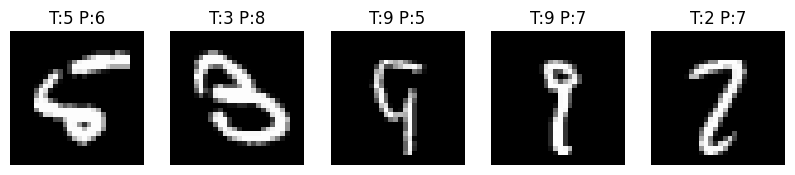

In [42]:
import matplotlib.pyplot as plt

def show_misclassified(samples, n = 5):
    plt.figure(figsize=(10,4))
    for i in range(n):
        img, true, pred = samples[i]
        plt.subplot(1, n, i + 1)
        plt.imshow(img.squeeze(), cmap="gray")
        plt.title(f"T:{true} P:{pred}")
        plt.axis("off")
    plt.show()

show_misclassified(misclassified, n=5)

In [39]:
model.eval()

misclassified = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        preds = outputs.argmax(dim=1)

        for i in range(len(labels)):
            if preds[i] != labels[i]:
                misclassified.append(
                    (images[i], labels[i].item(), preds[i].item())
                )

In [38]:
import torch

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        predictions = outputs.argmax(dim=1)

        total += labels.size(0)
        correct += (predictions == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9809


In [ ]:
model.eval() 

DigitClassifier(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (fc): Linear(in_features=21632, out_features=10, bias=True)
)

In [35]:
num_epochs = 3

for epoch in range(num_epochs):
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}")

Epoch 1, Loss: 68.7202
Epoch 2, Loss: 46.5582
Epoch 3, Loss: 34.9220


In [33]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [31]:
criterion = nn.CrossEntropyLoss()

In [32]:
model = DigitClassifier()

In [30]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=32,
            kernel_size=3
        )

        self.relu = nn.ReLU()

        self.fc = nn.Linear(
            in_features = 32 * 26 * 26,
            out_features = 10
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [18]:
import torch.nn as nn

In [14]:
images, labels = next(iter(train_loader))

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [13]:
train_loader = DataLoader(
    train_dataset,
    batch_size = 64,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False
)

In [12]:
from torch.utils.data import DataLoader

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

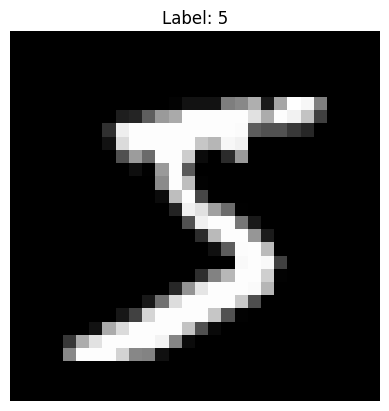

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")


In [10]:
image, label = train_dataset[0]

print(type(image))
print(image.shape)
print(label)

<class 'torch.Tensor'>
torch.Size([1, 28, 28])
5


In [8]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(
    root="../data",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='../data',
    train=False,
    download=False,
    transform=transform
)